In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize 

file_path = '/content/drive/MyDrive/MachineLearning/'

In [2]:
imgR, imgC, channel = 24, 24, 3
images = []

for i in range(40):
  file = file_path + str(i+1) + '.jpg'
  img = imread(file)
  img = resize(img, (imgR,imgC, channel))
  images.append(img)

In [3]:
def plot_images(nRow, nCol, img):
  fig = plt.figure()
  fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
  for i in range(nRow):
    for j in range(nCol):
      if nRow <= 1: axis = ax[j]
      else: axis = ax[i, j]
      axis.get_xaxis().set_visible(False)
      axis.get_yaxis().set_visible(False)
      axis.imshow(img[i*nCol+j])

<Figure size 432x288 with 0 Axes>

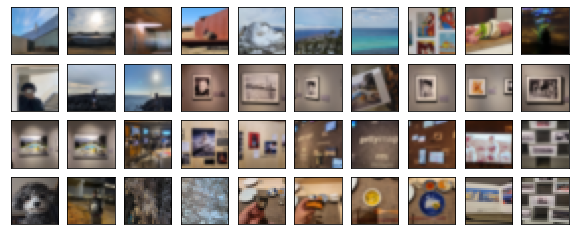

In [4]:
plot_images(4,10,images)

<Figure size 432x288 with 0 Axes>

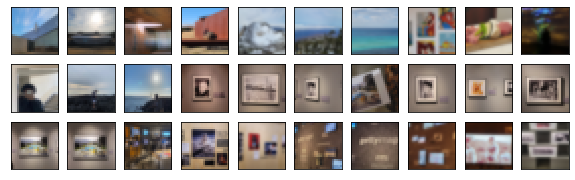

<Figure size 432x288 with 0 Axes>

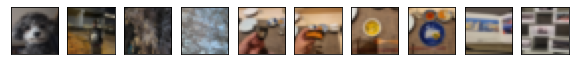

In [8]:
# 훈련용 데이터와 검증용 데이터 분리
x = np.array(images[:30])
x_test = np.array(images[30:])
plot_images(3,10,x)
plot_images(1,10,x_test)

In [14]:
x_noisy = x + np.random.rand(len(x), imgR, imgC, channel) * 0.1
x_noisy = np.clip(x_noisy, 0, 1)
x_test_noisy = x_test + np.random.randn(len(x_test),imgR, imgC, channel)*0.1
x_test_noisy = np.clip(x_test_noisy, 0, 1)
x_noisy

array([[[[0.38129235, 0.68484897, 0.83918182],
         [0.41848176, 0.67739488, 0.92743765],
         [0.44045927, 0.70825759, 0.84485555],
         ...,
         [0.74522548, 0.78415438, 0.8987837 ],
         [0.70713023, 0.76422064, 0.94237176],
         [0.7440304 , 0.76498027, 0.93642047]],

        [[0.41822808, 0.61889722, 0.91960866],
         [0.4186246 , 0.6162017 , 0.86318538],
         [0.40721332, 0.65071924, 0.93483873],
         ...,
         [0.74368566, 0.78665336, 0.92614928],
         [0.73292351, 0.85784767, 0.93001192],
         [0.72207693, 0.80190835, 0.88876883]],

        [[0.4016316 , 0.68491652, 0.8897967 ],
         [0.38001048, 0.6645643 , 0.92193773],
         [0.36718639, 0.61809564, 0.91974676],
         ...,
         [0.68881739, 0.84457999, 0.9512082 ],
         [0.77954564, 0.84324618, 0.92482725],
         [0.71656874, 0.78053253, 0.96435402]],

        ...,

        [[0.526343  , 0.48122983, 0.41754036],
         [0.51644692, 0.42643764, 0.40036529]

<Figure size 432x288 with 0 Axes>

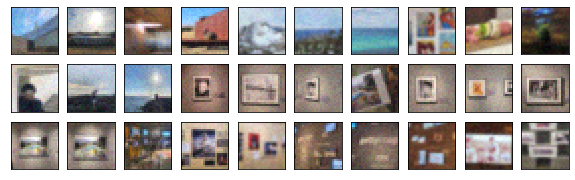

<Figure size 432x288 with 0 Axes>

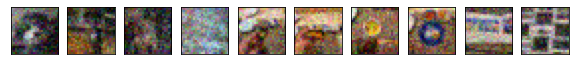

In [10]:
plot_images(3, 10, x_noisy)
plot_images(1, 10, x_test_noisy)

In [15]:
#사이킷 런의 k-nn 분류기는 이미지와 같은 2차원 이상의 데이터를 다루지 않고, 모든 입력을 1차원 벡터 데이터로 취급한다.
#따라서 입력 이미지 데이터 배열은 (이미지의 수, 이미지 픽셀의 수) 형태로 변형되어야 한다. numpy의 reshape() 함수 사용

x_noisy_flat = x_noisy.reshape(-1, imgR*imgC*channel)
x_flat = np.array(x.reshape(-1, imgR*imgC*channel) * 255, dtype=np.uint)
x_noisy_flat

array([[0.38129235, 0.68484897, 0.83918182, ..., 0.33176511, 0.35966385,
        0.2239478 ],
       [0.50147557, 0.56371213, 0.63865135, ..., 0.45198912, 0.3443444 ,
        0.30105948],
       [0.34627788, 0.26444745, 0.20732351, ..., 0.45932825, 0.46452815,
        0.4617919 ],
       ...,
       [0.54407779, 0.665989  , 0.63300672, ..., 0.41657073, 0.28272303,
        0.15137834],
       [0.28011546, 0.11444108, 0.15356508, ..., 0.26883895, 0.17364437,
        0.06233711],
       [0.18490678, 0.15622453, 0.21127368, ..., 0.38038687, 0.32953004,
        0.2925743 ]])

In [12]:
#잡음 이미지를 입력으로 깨끗한 이미지를 정답으로 분류기 훈련
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_noisy_flat, x_flat)

KNeighborsClassifier()

<Figure size 432x288 with 0 Axes>

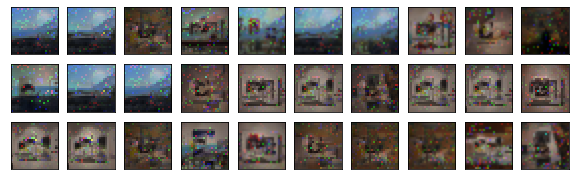

In [13]:
denoised_result = knn.predict(x_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)
plot_images(3, 10, denoised_result)

In [16]:
#데이터를 증강하여 훈련 효과 높이기
n_augmentation = 100
x_noisy_aug = x + np.random.rand(len(x), imgR, imgC, channel) * 0.2
y_label = np.array(x * 255, dtype = np.uint)
y = y_label

print(x_noisy.shape)
for i in range(n_augmentation):
  noisy_data = x + np.random.randn(len(x), imgR, imgC, channel) * 0.2
  x_noisy_aug = np.append(x_noisy_aug, noisy_data, axis = 0)
  y = np.append(y, y_label, axis = 0)

x_noisy_aug = np.clip(x_noisy_aug, 0, 1)
x_noisy_aug.shape, y.shape

(30, 24, 24, 3)


((3030, 24, 24, 3), (3030, 24, 24, 3))

<Figure size 432x288 with 0 Axes>

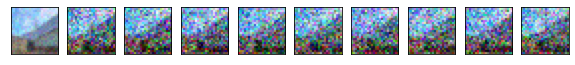

In [17]:
plot_images(1, 10, x_noisy_aug[0:300:30])

In [18]:
x_noisy_aug_flat = x_noisy_aug.reshape(-1, imgR*imgC*channel)
y_flat = y.reshape(-1, imgR*imgC*channel)

knn.fit(x_noisy_aug_flat, y_flat)

KNeighborsClassifier()

<Figure size 432x288 with 0 Axes>

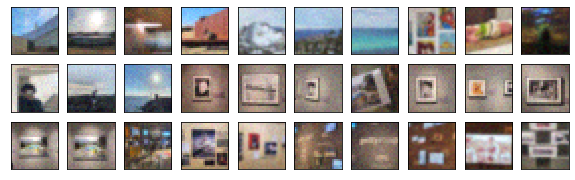

<Figure size 432x288 with 0 Axes>

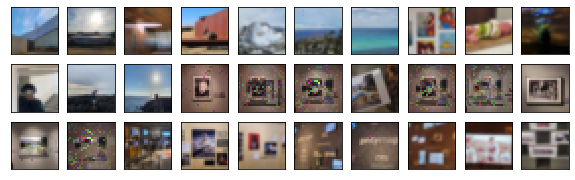

In [19]:
denoised_result = knn.predict(x_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)

plot_images(3, 10, x_noisy)
plot_images(3, 10, denoised_result)

<Figure size 432x288 with 0 Axes>

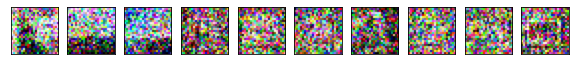

<Figure size 432x288 with 0 Axes>

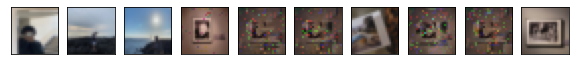

In [20]:
rndidx = np.random.randint(0, 20)
data = x[rndidx:rndidx+10] + np.random.randn(10, imgR, imgC, channel) * 0.4
data = np.clip(data, 0, 1)
data_flat = data.reshape(-1, imgR*imgC*channel)

denoised = knn.predict(data_flat)
denoised = denoised.reshape(-1, imgR, imgC, channel)
denoised = np.clip(denoised, 0, 255)

plot_images(1, 10, data)
plot_images(1, 10, denoised)

<Figure size 432x288 with 0 Axes>

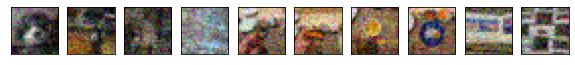

<Figure size 432x288 with 0 Axes>

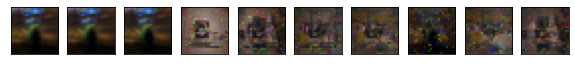

In [21]:
denoised = knn.predict(x_test_noisy.reshape(-1, imgR*imgC*channel))
denosied = denoised.reshape(-1, imgR, imgC, channel)

plot_images(1, 10, x_test_noisy)
plot_images(1, 10, denosied)

In [22]:
#데이터 증강으로 일반화 능력 높이기
#케라스 API ImageDataGenerator 클래스 (회전, 확대축소, 기울이기, 상하좌우반전 등)

from keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(rotation_range = 360, zoom_range=0.1, shear_range=0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True)

In [23]:
y_aug = x.reshape(-1, imgR,imgC,channel)
it = image_generator.flow(y_aug)
nData = y_aug.shape[0]

In [24]:
x_aug = y_aug+np.random.randn(nData, imgR, imgC, channel) * 0.1

In [25]:
n_augmentation = 500
for _ in range(n_augmentation):
  new_y = it.next()
  new_x = new_y + np.random.randn(nData, imgR, imgC, channel) * 0.1
  y_aug = np.append(y_aug, new_y)
  x_aug = np.append(x_aug, new_x)

y_aug = np.array(y_aug * 255, dtype = np.uint)
y_aug = y_aug.reshape(-1, imgR, imgC, channel)
x_aug = x_aug.reshape(-1, imgR, imgC, channel)

<Figure size 432x288 with 0 Axes>

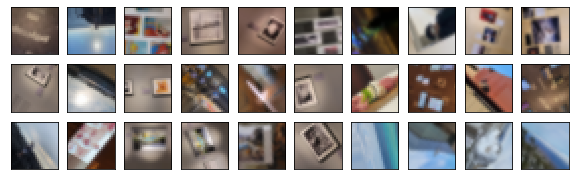

In [26]:
y_aug = np.clip(y_aug, 0,255)
x_aug = np.clip(x_aug, 0, 1)
plot_images(3, 10, y_aug[30:])

In [27]:
#새로 학습하고 검증용 데이터 적용하기
x_aug_flat = x_aug.reshape(-1, imgR*imgC*channel)
y_aug_flat = y_aug.reshape(-1, imgR*imgC*channel)
knn.fit(x_aug_flat, y_aug_flat)

KNeighborsClassifier()

<Figure size 432x288 with 0 Axes>

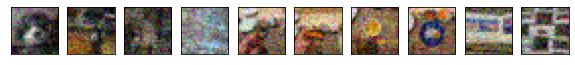

<Figure size 432x288 with 0 Axes>

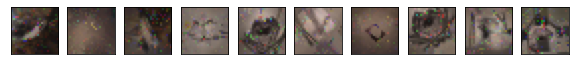

In [28]:
denoised = knn.predict(x_test_noisy.reshape(-1, imgR*imgC*channel))
denosied = denoised.reshape(-1, imgR, imgC, channel)
plot_images(1, 10, x_test_noisy)
plot_images(1, 10, denosied)

<Figure size 432x288 with 0 Axes>

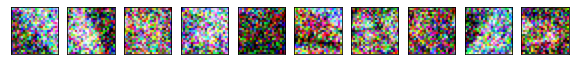

<Figure size 432x288 with 0 Axes>

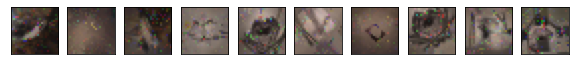

In [29]:
images = it.next()
testX = images + np.random.randn(nData, imgR, imgC, channel) * 0.4
testX = np.clip(testX, 0, 1)
denosied = knn.predict(testX.reshape(-1, imgR*imgC*channel))
denosied = denoised.reshape(-1, imgR, imgC, channel)

plot_images(1, 10, testX)
plot_images(1, 10, denosied)